#  1) Linear Regression

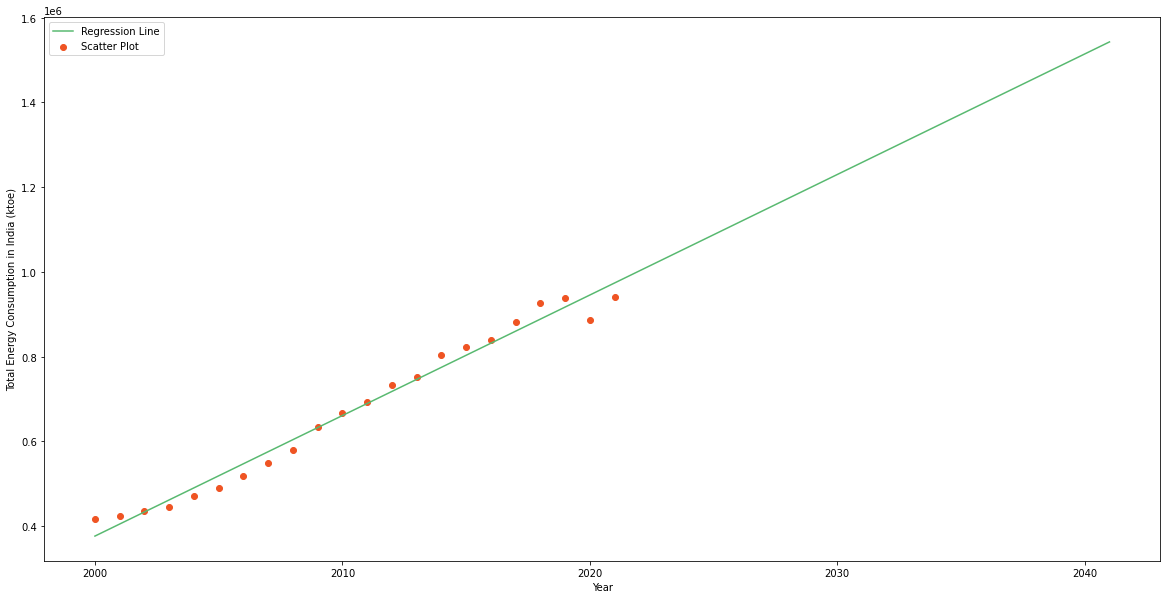

Score : 
0.980265700086015


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

data = pd.read_excel(r'D:\Innovation Lab\Total Energy Comsumpution in India.xlsx')

X = data['Year'].values
Y = data['Total Energy Comsumption in India (ktoe)'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numerator = 0
denominator = 0
for i in range(n):
    numerator = numerator + (X[i] - mean_x)*(Y[i] - mean_y)
    denominator = denominator + (X[i] - mean_x)**2
        
m = numerator/denominator
c = mean_y - (m*mean_x)

max_x = np.max(X) + 20
x = np.linspace(2000,max_x,41)
y = m*x + c

plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c = '#ef5423',label = 'Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption in India (ktoe)')
plt.legend()
plt.show()

ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = m*X[i] + c
    ss_t = ss_t + (Y[i] - mean_y)**2
    ss_r = ss_r + (Y[i] - y_pred)**2
    
R2 = 1 - (ss_r/ss_t)
print("Score : ")
print(R2)

# 2) Linear Regression (Gradient Descent)

C:\Users\GNYANESH\AppData\Local\Temp\ipykernel_25148\1138286910.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


m =  0.9900836791638598
c =  1.115774139748286e-16


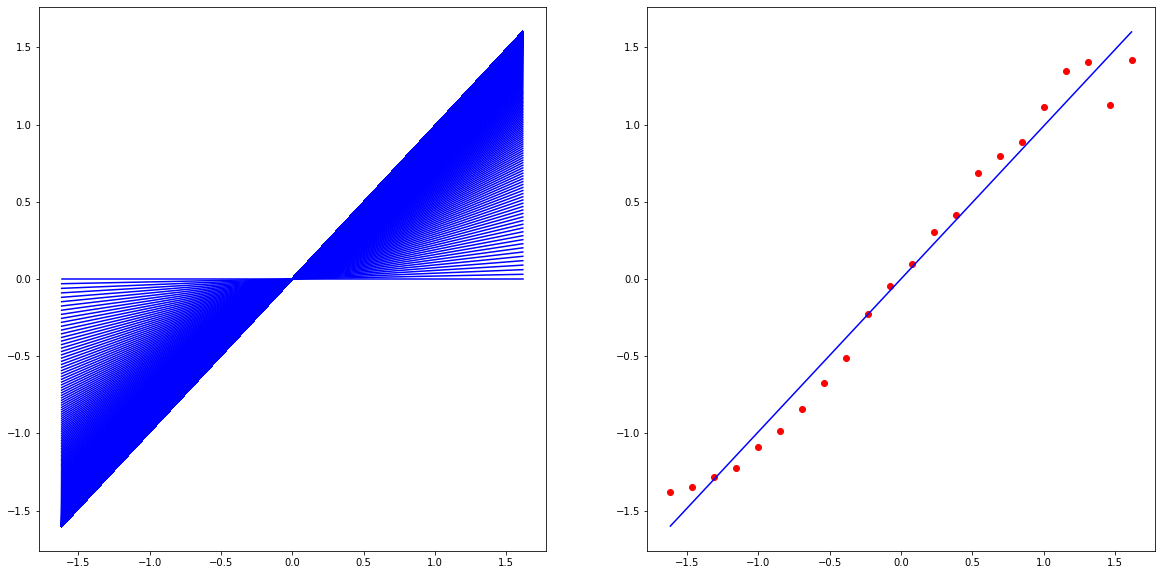

R2 =  0.9802657000860164


<AxesSubplot: xlabel='index'>

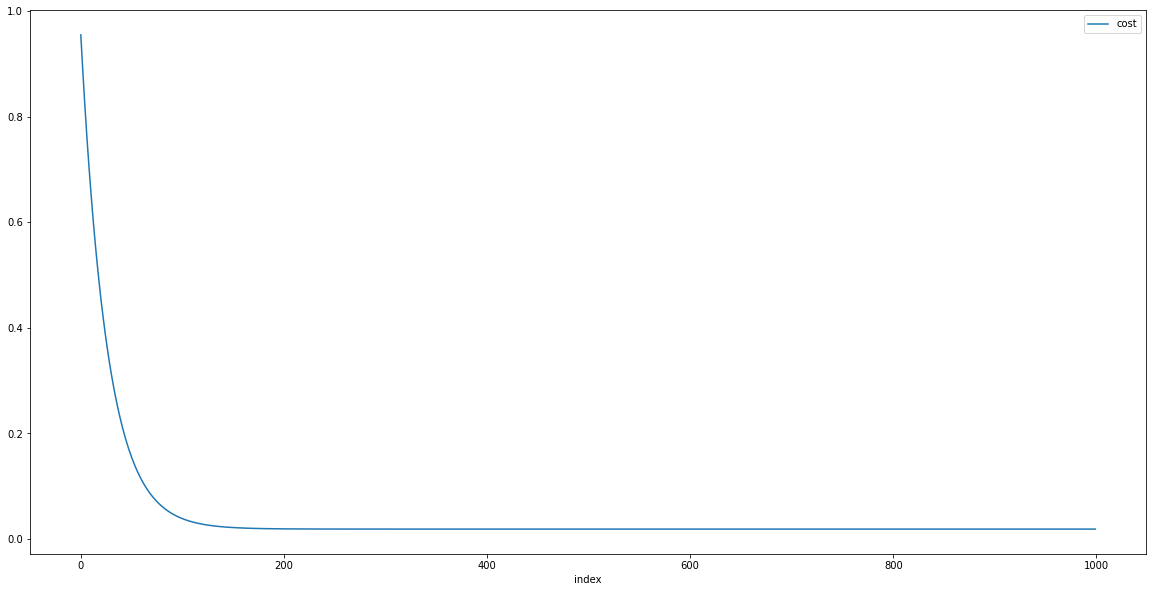

In [2]:
import pandas as pd
Energy = pd.read_excel('D:\Innovation Lab\Total Energy Comsumpution in India.xlsx')
Energy.head()
X = Energy['Year'].values
Y = Energy['Total Energy Comsumption in India (ktoe)'].values

Energy_n = (Energy - Energy.mean())/Energy.std()

Xn = Energy_n['Year'].values
Yn = Energy_n['Total Energy Comsumption in India (ktoe)'].values

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

plt.scatter(Xn,Yn,c = '#ef5423',label = 'Scatter Plot')

import numpy as np
Xn = np.array(Xn)
Yn = np.array(Yn)
X = np.array(X)
Y = np.array(Y)

def gradient(X,Y,iters = 1000, learning_rate = 0.01):
    global m_current 
    global c_current
    m_current = 0
    c_current = 0
    n = (len(Y))
    gd_df = pd.DataFrame(columns = ['m_current','c_current','cost'])
    for i in range (iters):
        y_current = (m_current*X) + c_current
        cost = sum([data**2 for data in (Y - y_current)])/n
        m_gradient = -(2/n) * sum(X * (Y - y_current))
        c_gradient = -(2/n) * sum(Y - y_current)
        m_current = m_current - (learning_rate*m_gradient)
        c_current = c_current - (learning_rate*c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
        plt.subplot(1,2,1)
        plt.plot(X,y_current,color = 'blue',label = 'Regression line')
        
    m = m_current
    c = c_current
    print('m = ',m)
    print('c = ',c)
    max_x = np.max(Xn) 
    min_x = np.min(Xn)
    x = np.linspace(min_x,max_x,20)
    y = m*x + c
    plt.subplot(1,2,2)
    plt.plot(x,y,color = 'blue',label = 'Regression line')
    plt.scatter(Xn,Yn,color = 'red',label = 'Scatter plot')
    plt.show()
    #R2 value
    mean_y = np.mean(Yn)
    ss_t = 0
    ss_r = 0

    for i in range(n):
        y_pred = m*X[i] + c
        ss_t = ss_t + (Y[i] - mean_y)**2
        ss_r = ss_r + (Y[i] - y_pred)**2
    
    R2 = 1 - (ss_r/ss_t)
    print('R2 = ',R2)
    return(gd_df)

gradients = gradient(Xn,Yn)
gradients

gradients.reset_index().plot.line(x = 'index', y = ['cost'] )

#  3) Auto Regression

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   18
Model:                     AutoReg(6)   Log Likelihood                -120.535
Method:               Conditional MLE   S.D. of innovations           5572.639
Date:                Wed, 09 Nov 2022   AIC                            257.070
Time:                        15:39:00   BIC                            260.949
Sample:                             6   HQIC                           255.633
                                   18                                         
                 coef    std err         

C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Root Mean Square Error : 
35889.55023575637
The future prediction
[914582.34661699 948076.61642959 946055.5422576  892860.90396726
 957680.16158371 873527.98213413 900171.53120622]


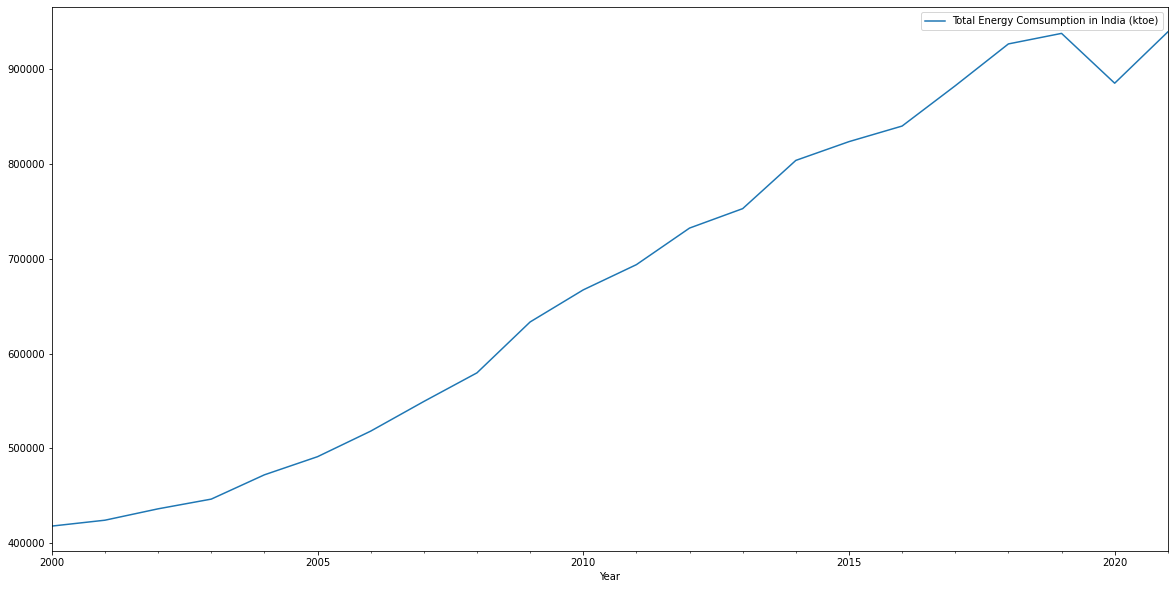

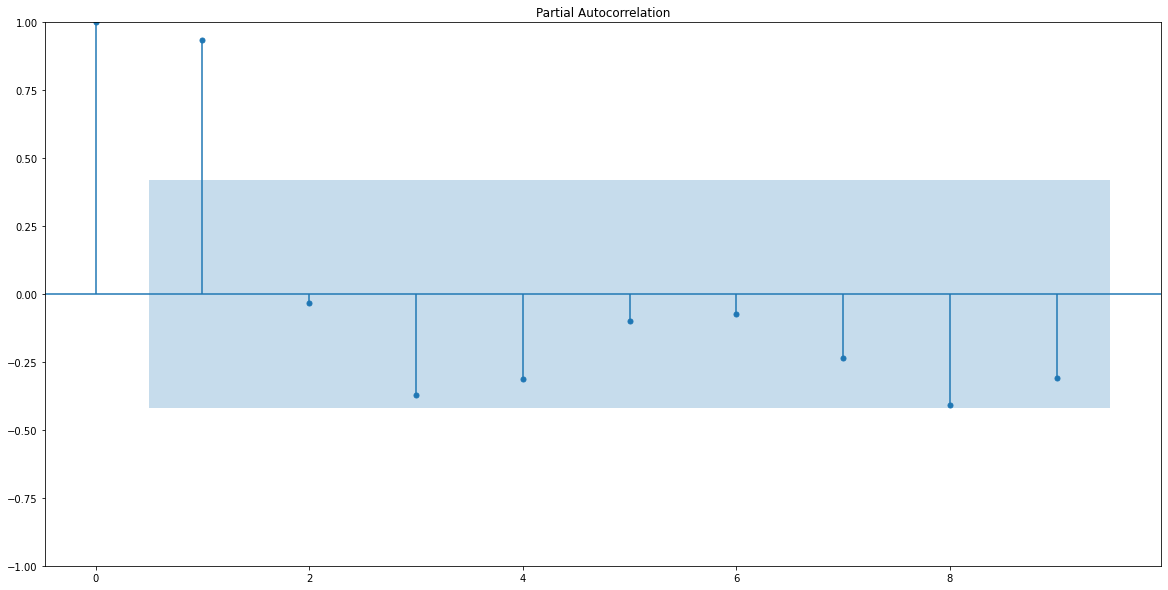

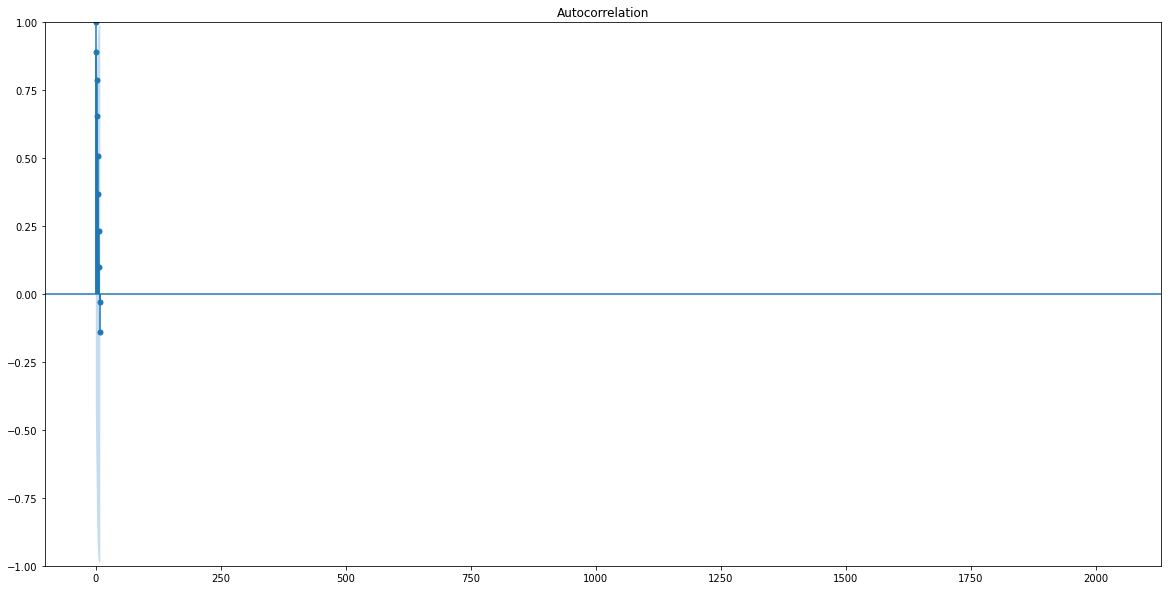

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

df = pd.read_excel('D:\Innovation Lab\Total Energy Comsumpution in India.xlsx',index_col = 0, parse_dates = True)
X = df.values

df.plot()

from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test : ')
dftest = adfuller(df['Total Energy Comsumption in India (ktoe)'],autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','P-value','#lags used','Number of Observation used'])
for key,value in dftest[4].items() :
    dfoutput['CriticalValue(%s)'%key] = value
print(dfoutput)

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['Total Energy Comsumption in India (ktoe)'],lags = 9)
acf = plot_acf(df['Total Energy Comsumption in India (ktoe)'],lags = 9)

train = X[:len(X) - 4]
test = X[len(X) - 4:]

model = AutoReg(train, lags = 6).fit()

print(model.summary())

pred = model.predict(start = len(train), end = len(X)-1, dynamic = False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color = 'red')
print(pred)

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print("Root Mean Square Error : ")
print(rmse)

pred_future = model.predict(start = len(X) + 1, end = len(X) + 7,dynamic = False)
print("The future prediction")
print(pred_future)

x = np.linspace(2022,2029,7)
plt.plot(x,pred_future)

#  4) ARIMA 

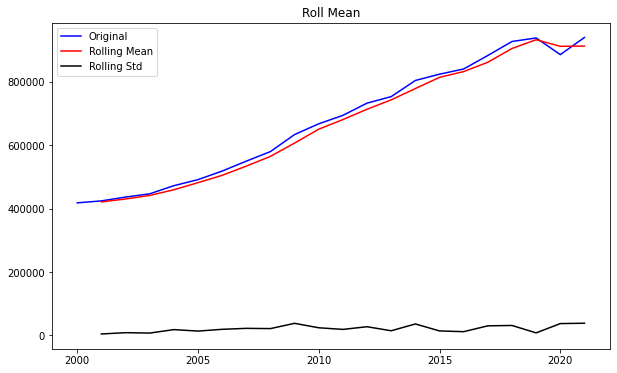

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
      Total Energy Comsumption in India (ktoe)
Year                                          
2000                                       NaN
2001                                  420987.0
2002                                  430101.5
2003                                  441229.5
2004                                  459175.0
2005                                  481567.0
2006                                  504626.0
2007                                  533762.0
2008                                  564520.5
2009                                  606487.5
2010                                  650279.5
2011                                  680529.5
2012           

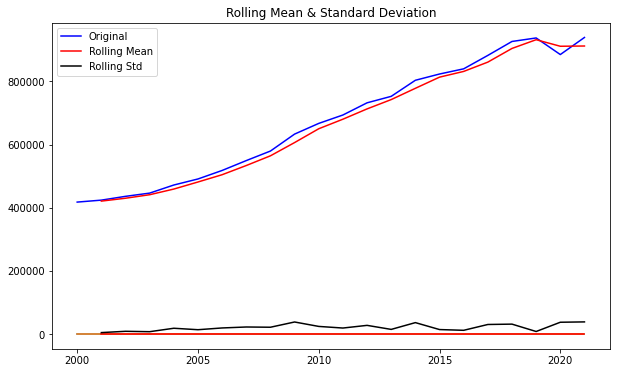

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
      Total Energy Comsumption in India (ktoe)
Year                                          
2000                                       NaN
2001                                  420987.0
2002                                  430101.5
2003                                  441229.5
2004                                  459175.0
2005                                  481567.0
2006                                  504626.0
2007                                  533762.0
2008                                  564520.5
2009                                  606487.5
2010                                  650279.5
2011                                  680529.5
2012           

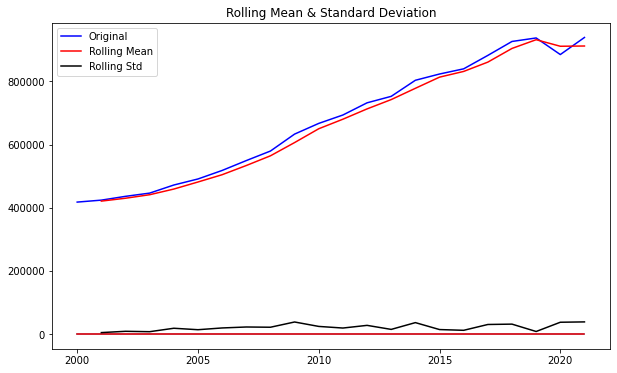

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
      Total Energy Comsumption in India (ktoe)
Year                                          
2000                                       NaN
2001                                  420987.0
2002                                  430101.5
2003                                  441229.5
2004                                  459175.0
2005                                  481567.0
2006                                  504626.0
2007                                  533762.0
2008                                  564520.5
2009                                  606487.5
2010                                  650279.5
2011                                  680529.5
2012           

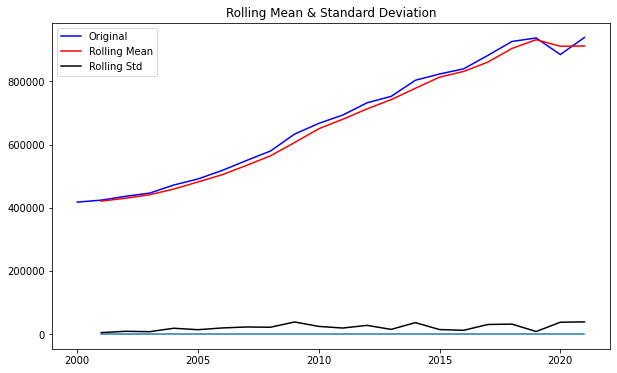

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
      Total Energy Comsumption in India (ktoe)
Year                                          
2000                                       NaN
2001                                  420987.0
2002                                  430101.5
2003                                  441229.5
2004                                  459175.0
2005                                  481567.0
2006                                  504626.0
2007                                  533762.0
2008                                  564520.5
2009                                  606487.5
2010                                  650279.5
2011                                  680529.5
2012           

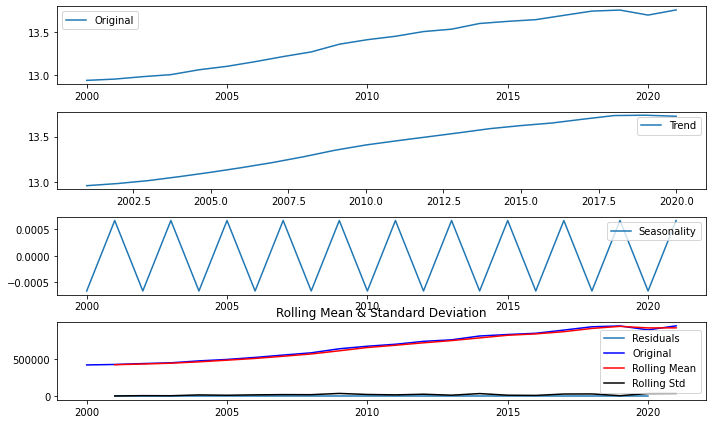

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64
      Total Energy Comsumption in India (ktoe)
Year                                          
2000                                       NaN
2001                                  420987.0
2002                                  430101.5
2003                                  441229.5
2004                                  459175.0
2005                                  481567.0
2006                                  504626.0
2007                                  533762.0
2008                                  564520.5
2009                                  606487.5
2010                                  650279.5
2011                                  680529.5
2012           

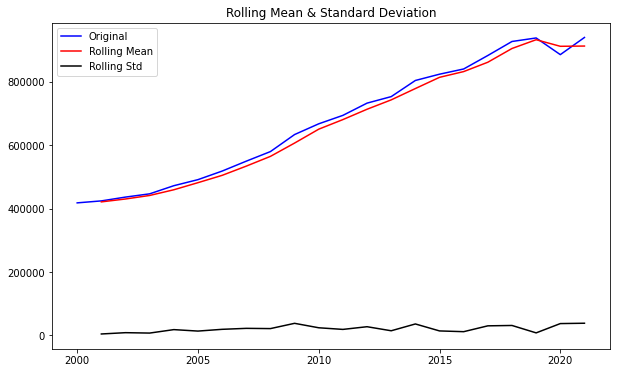

Result of Dickey-Fuller Test : 
Test Statistics               -1.932201
P-value                        0.317067
#lags used                     9.000000
Number of Observation used    12.000000
CriticalValue(1%)             -4.137829
CriticalValue(5%)             -3.154972
CriticalValue(10%)            -2.714477
dtype: float64


C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ign

Plotting AR model
plotting AR model
Year
2000     0.000000
2001    20.976881
2002     8.661809
2003    18.110369
2004    11.434797
dtype: float64
Year
2000     0.000000
2001    20.976881
2002    29.638690
2003    47.749059
2004    59.183855
dtype: float64


C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GNYANESH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction resul

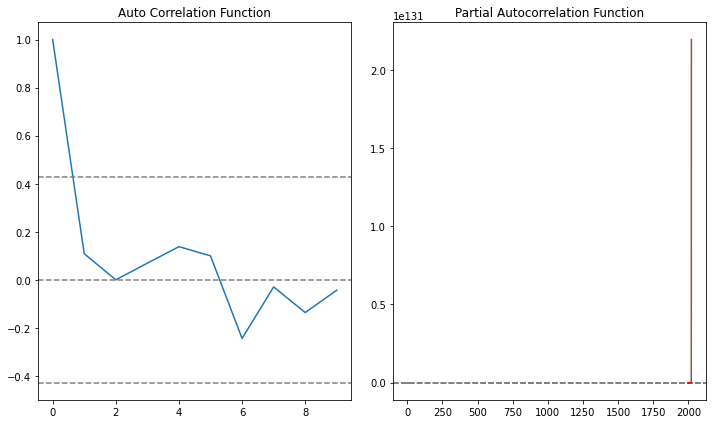

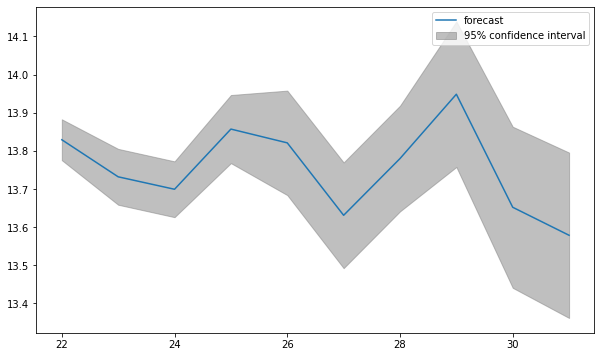

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

DataSet = pd.read_excel('D:\Innovation Lab\Total Energy Comsumpution in India.xlsx', parse_dates = True)
index_col = 0
#DataSet['Year'] = pd.
#DataSet['Year'] =  pd.to_datetime(DataSet['Year'],format='%Y-%m-%d %H:%M:%S.%f', infer_datetime_format = True)
IndexedDataSet = DataSet.set_index(['Year'])

from datetime import datetime
IndexedDataSet.head()

rol_mean = IndexedDataSet.rolling(window=2).mean()
rol_std = IndexedDataSet.rolling(window=2).std()

orig = plt.plot(IndexedDataSet,color = 'blue',label = 'Original')
mean = plt.plot(rol_mean,color = 'red',label = 'Rolling Mean')
std = plt.plot(rol_std,color = 'black',label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Roll Mean')

plt.show(block = False)

from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test : ')
dftest = adfuller(IndexedDataSet['Total Energy Comsumption in India (ktoe)'],autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','P-value','#lags used','Number of Observation used'])
for key,value in dftest[4].items() :
    dfoutput['CriticalValue(%s)'%key] = value
print(dfoutput)

IndexedDataSet_logScale = np.log(IndexedDataSet)
plt.plot(IndexedDataSet_logScale)

# Moving Average
movingAverage = IndexedDataSet_logScale.rolling(window = 2).mean()
movingStd = IndexedDataSet_logScale.rolling(window = 2).std()
plt.plot(IndexedDataSet_logScale)
plt.plot(movingAverage,color = 'red')

DataSetlogScaleMinusMovingAverage = IndexedDataSet_logScale - movingAverage
DataSetlogScaleMinusMovingAverage.head()
DataSetlogScaleMinusMovingAverage.dropna(inplace = True)
DataSetlogScaleMinusMovingAverage.head

from statsmodels.tsa.stattools import adfuller
def Test_Stationary(timeseries):
    rol_mean = IndexedDataSet.rolling(window=2).mean()
    rol_std = IndexedDataSet.rolling(window=2).std()
    print(rol_mean,rol_std)
    
    orig = plt.plot(IndexedDataSet,color = 'blue',label = 'Original')
    mean = plt.plot(rol_mean,color = 'red',label = 'Rolling Mean')
    std = plt.plot(rol_std,color = 'black',label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    from statsmodels.tsa.stattools import adfuller
    print('Result of Dickey-Fuller Test : ')
    dftest = adfuller(IndexedDataSet['Total Energy Comsumption in India (ktoe)'],autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','P-value','#lags used','Number of Observation used'])
    for key,value in dftest[4].items() :
        dfoutput['CriticalValue(%s)'%key] = value
    print(dfoutput)
    
Test_Stationary(DataSetlogScaleMinusMovingAverage)

ExponentialDecayWeightedAverage = IndexedDataSet_logScale.ewm(halflife = 2,min_periods = 0, adjust = True).mean()
plt.plot(IndexedDataSet_logScale)
plt.plot(ExponentialDecayWeightedAverage,color = 'red')

DataSetlogScaleMinusMovingExponentialDecayAverage = IndexedDataSet_logScale - ExponentialDecayWeightedAverage
Test_Stationary(DataSetlogScaleMinusMovingExponentialDecayAverage)

DataSetlogDiffShifting = IndexedDataSet_logScale - IndexedDataSet_logScale.shift()
plt.plot(DataSetlogDiffShifting)

DataSetlogDiffShifting.dropna(inplace = True)
Test_Stationary(DataSetlogDiffShifting)

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
#decompfreq = 6*12
#Decomposition = sm.tsa.seasonal_decompose(IndexedDataSet_logScale, period = 2)
#trend = decomposition.trend
Decomposition = seasonal_decompose(IndexedDataSet_logScale, period = 2)
trend = Decomposition.trend
seasonal = Decomposition.seasonal
residual = Decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataSet_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

DecomposedlogData = residual
DecomposedlogData.dropna(inplace = True)
Test_Stationary(DecomposedlogData)

DecomposedlogData = residual
DecomposedlogData.dropna(inplace = True)
Test_Stationary(DecomposedlogData)

from statsmodels.tsa.stattools import acf,pacf
Lag_acf = acf(DataSetlogDiffShifting,nlags = 9)
Lag_pacf = pacf(DataSetlogDiffShifting,nlags = 9, method = 'ols')

plt.subplot(121)
plt.plot(Lag_acf)
plt.axhline(y = 0, linestyle = '--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(DataSetlogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(DataSetlogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Auto Correlation Function')

plt.subplot(122)
plt.plot(Lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(DataSetlogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(DataSetlogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

from statsmodels.tsa.arima.model import ARIMA
DataSetlogDiffShifting = IndexedDataSet_logScale - IndexedDataSet_logScale.shift()
model = ARIMA(IndexedDataSet_logScale, order = (5, 1, 1),enforce_invertibility=False,enforce_stationarity=False)
#enforce_stationary=True
#enforce_invertibility=True
results_AR = model.fit()
plt.plot(DataSetlogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title = ('RSS : %.4f'%sum((results_AR.fittedvalues - DataSetlogDiffShifting['Total Energy Comsumption in India (ktoe)'])**2))
print('Plotting AR model')

DataSetlogDiffShifting = IndexedDataSet_logScale - IndexedDataSet_logScale.shift()
model = ARIMA(IndexedDataSet_logScale, order = (0,1,2),enforce_invertibility=False,enforce_stationarity=False)
result_MA = model.fit()
plt.plot(DataSetlogDiffShifting)
plt.plot(result_MA.fittedvalues, color = 'red')
plt.title = ('RSS : %.4f'%sum((result_MA.fittedvalues - DataSetlogDiffShifting['Total Energy Comsumption in India (ktoe)'])**2))
print('plotting AR model')

model = ARIMA(IndexedDataSet_logScale, order = (4,1,2),enforce_invertibility=False,enforce_stationarity=False)
results_ARIMA = model.fit()
plt.plot(DataSetlogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color = 'red')
plt.title = ('RSS : %.4f'%sum((results_ARIMA.fittedvalues - DataSetlogDiffShifting['Total Energy Comsumption in India (ktoe)'])**2))

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(IndexedDataSet_logScale['Total Energy Comsumption in India (ktoe)'],index = IndexedDataSet_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataSet)
plt.plot(predictions_ARIMA)

IndexedDataSet_logScale

from statsmodels.graphics.tsaplots import plot_predict
plt.plot(IndexedDataSet_logScale, color = 'red')
plot_predict(results_ARIMA,22,31)
x = results_ARIMA.forecast(steps = 10)
#plt.plot(IndexedDataSet_logScale, color = 'blue')
#plt.plot(x, color = 'red')



#  5) SVR (Support Vector Regression)

C:\Users\GNYANESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


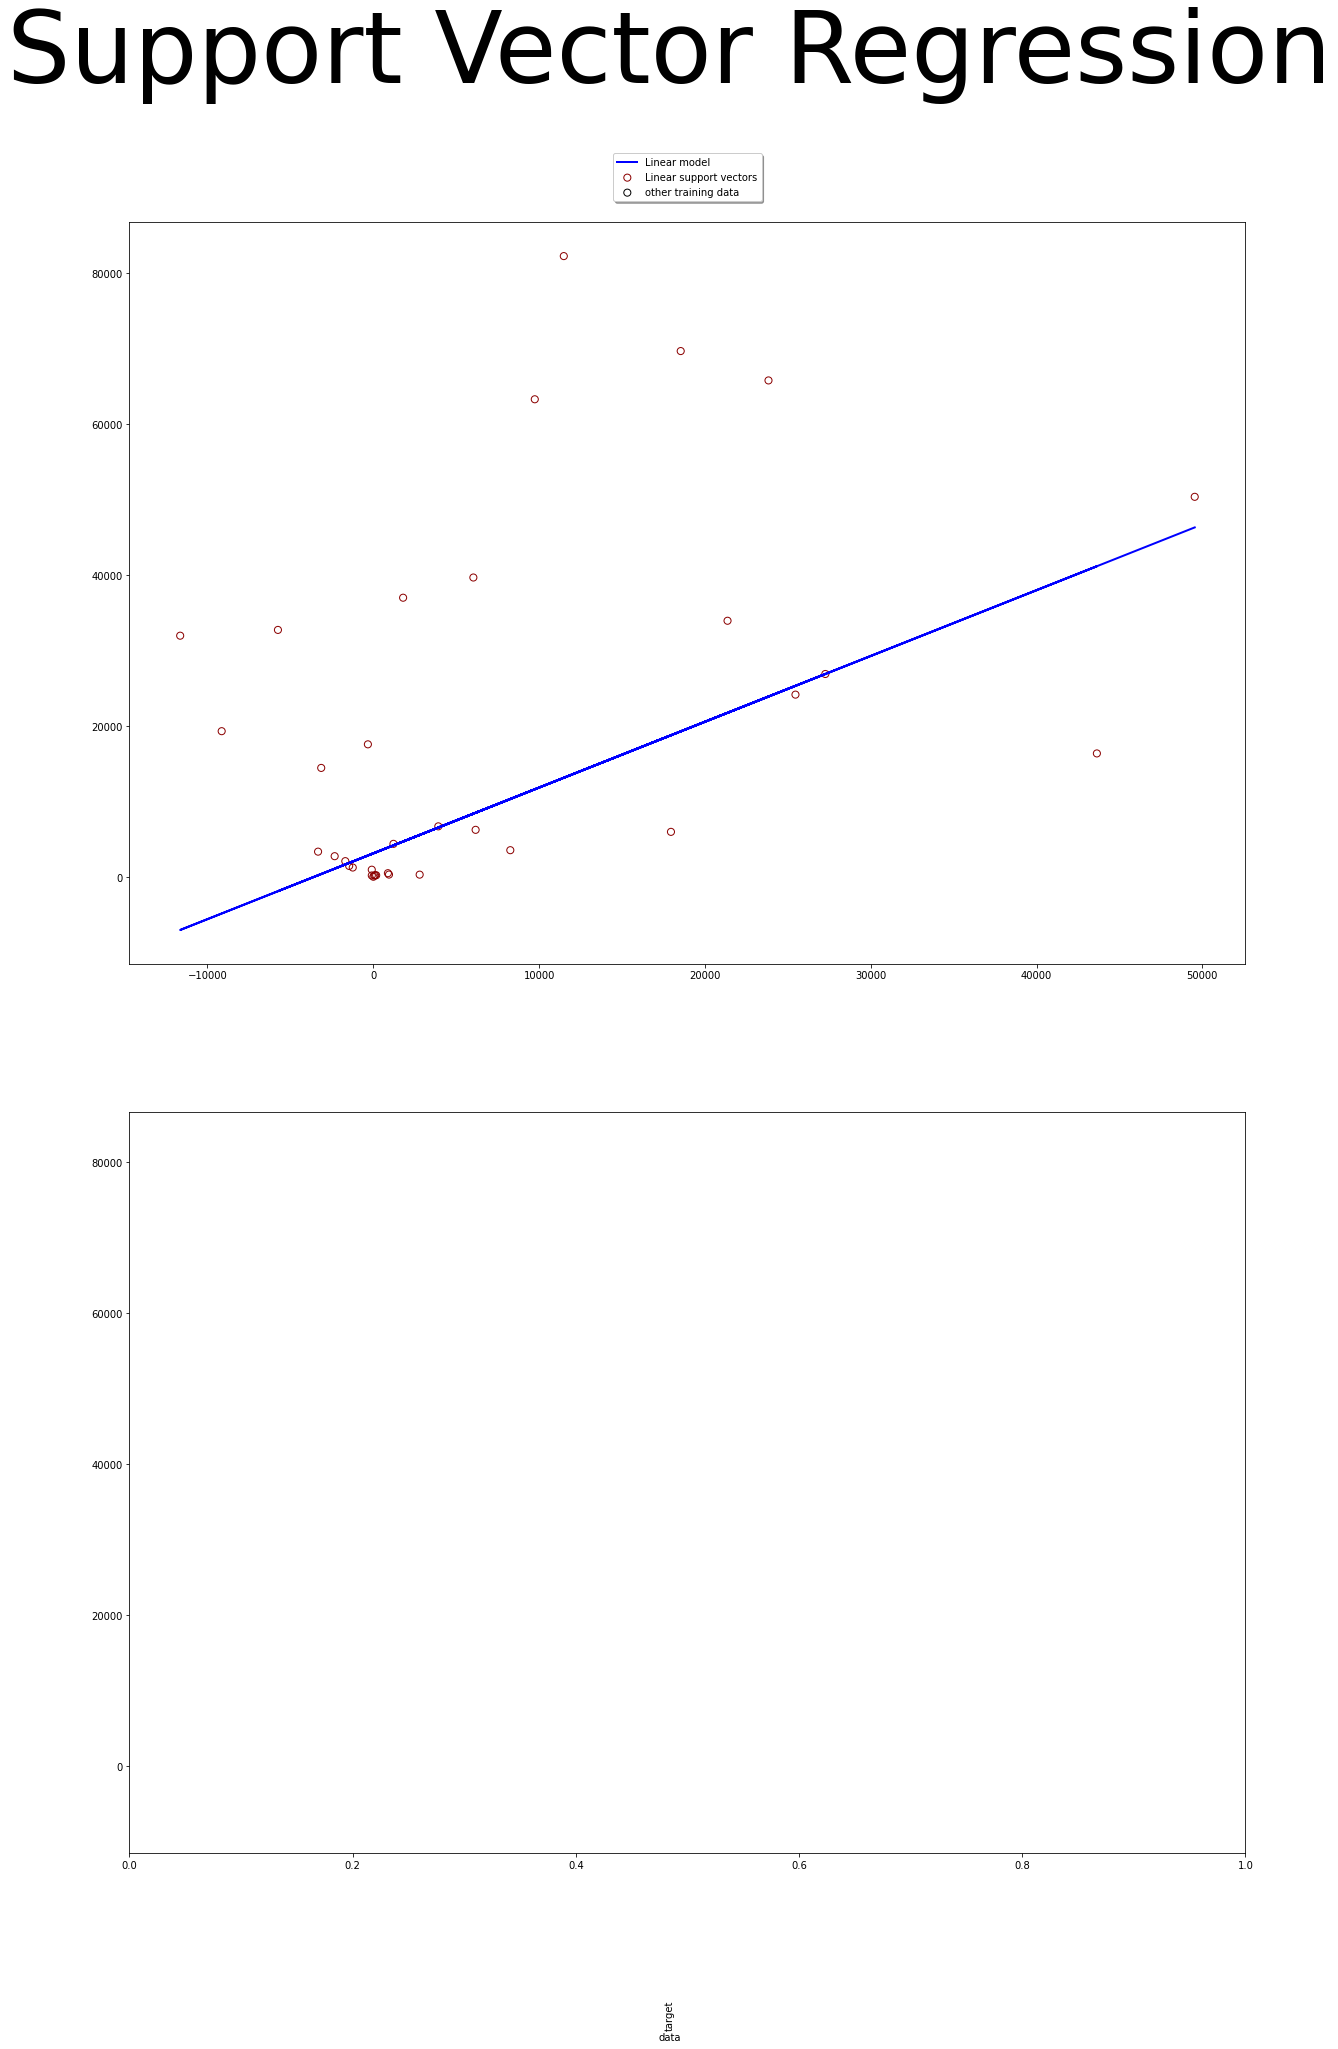

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Energy_data = pd.read_excel('D:\Innovation Lab\Production VS Consumption.xlsx')
#Energy_data = Energy_data.dropna()
#print(Energy_data)

X = Energy_data.loc[0:34,"Production(2010)"]
y = Energy_data.loc[0:34,"Consumption(2010)"]
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
Z = X - y
Target = Energy_data.loc[0:34,"Target"]
#y = y.ravel()
st_x = StandardScaler()
st_y = StandardScaler()
#X = st_x.fit_transform(X)
#y = st_x.fit_transform(y.reshape(-1,1))
#y = Target
X = Z
#p = X
#X = y
#y = p

svr_lin = SVR(kernel="linear", C=100, gamma="auto")

lw = 2

svrs = [svr_lin]
kernel_label = ["Linear"]
model_color = ["darkred"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 30), sharey=True)
for ix,svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color='blue', #model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.10),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.5, 0.05, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=100)
plt.show()


#  6) KNN (K-Nearest Neighbors)

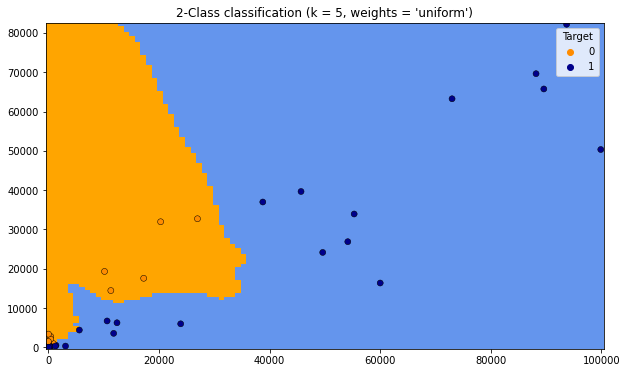

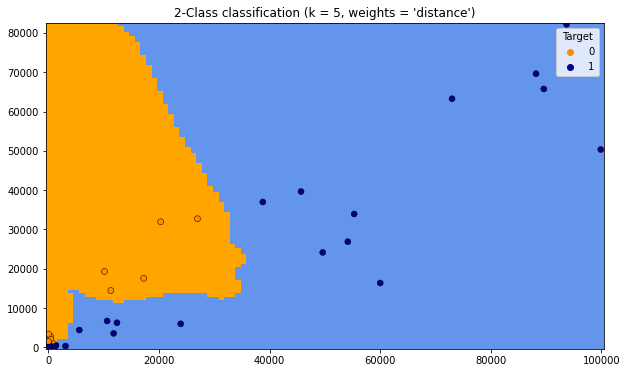

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

Energy_data = pd.read_excel('D:\Innovation Lab\Production VS Consumption.xlsx')
dataset = Energy_data.values

X = Energy_data.loc[0:34,"Production(2010)"]
y = Energy_data.loc[0:34,"Consumption(2010)"]
X = X.values.reshape(-1,35)
y = y.values.reshape(-1,35)
#Z = X - y
Target = Energy_data.loc[0:34,"Target"]
#y = y.ravel()
st_x = StandardScaler()
st_y = StandardScaler()
#X = st_x.fit_transform(X)
#y = st_x.fit_transform(y)
X = np.vstack((X, y)).T
#X = st_x.fit_transform(X)
y = Target
#X = Z
#p = X
#X = y
#y = p

n_neighbors = 5
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        #xlabel=X.all(),
        #ylabel=y.all(),
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

# K-NEAREST NEIGHBORS

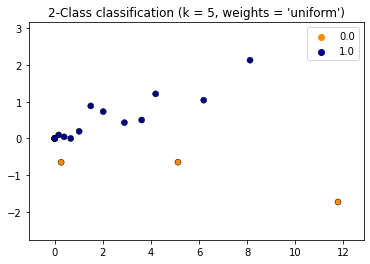

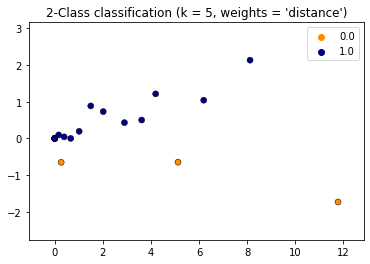

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

Data = pd.read_excel(r'D:\Innovation Lab\Renewable Energy Production (top 5 states).xlsx', index_col = 0)
Data = Data.T

Data = Data.fillna(0)
Target = np.zeros(shape = (20))
K1 = np.array(Data.Karnataka[0:4])
T1 = np.array(Data.Tamil_Nadu[0:4])
R1 = np.array(Data.Rajasthan[0:4])
G1 = np.array(Data.Gujarat[0:4])
A1 = np.array(Data.Andhra_Pradesh[0:4])
K2 = np.array(Data.Karnataka[4:8])
T2 = np.array(Data.Tamil_Nadu[4:8])
R2 = np.array(Data.Rajasthan[4:8])
G2 = np.array(Data.Gujarat[4:8])
A2 = np.array(Data.Andhra_Pradesh[4:8])
#K = np.array(K)
P = np.concatenate((K1,T1,R1,G1,A1))
Q = np.concatenate((K2,T2,R2,G2,A2))
#X = np.concatenate((X,Y), axis=0)
#Y = X
Y = Q - P
for i in range (20):
    if Y[i] < 0:
        Target[i] = 0
    else:
        Target[i] = 1

X = np.vstack((Q, Y)).T
Y = Target

n_neighbors = 5
cmap_light = ListedColormap(["white", "white"])
cmap_bold = ["darkorange", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        #xlabel=X.all(),
        #ylabel=y.all(),
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=Y,
        palette= cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

#  7) K-Means Clusturing

C:\Users\GNYANESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: scatter() got multiple values for argument 'c'

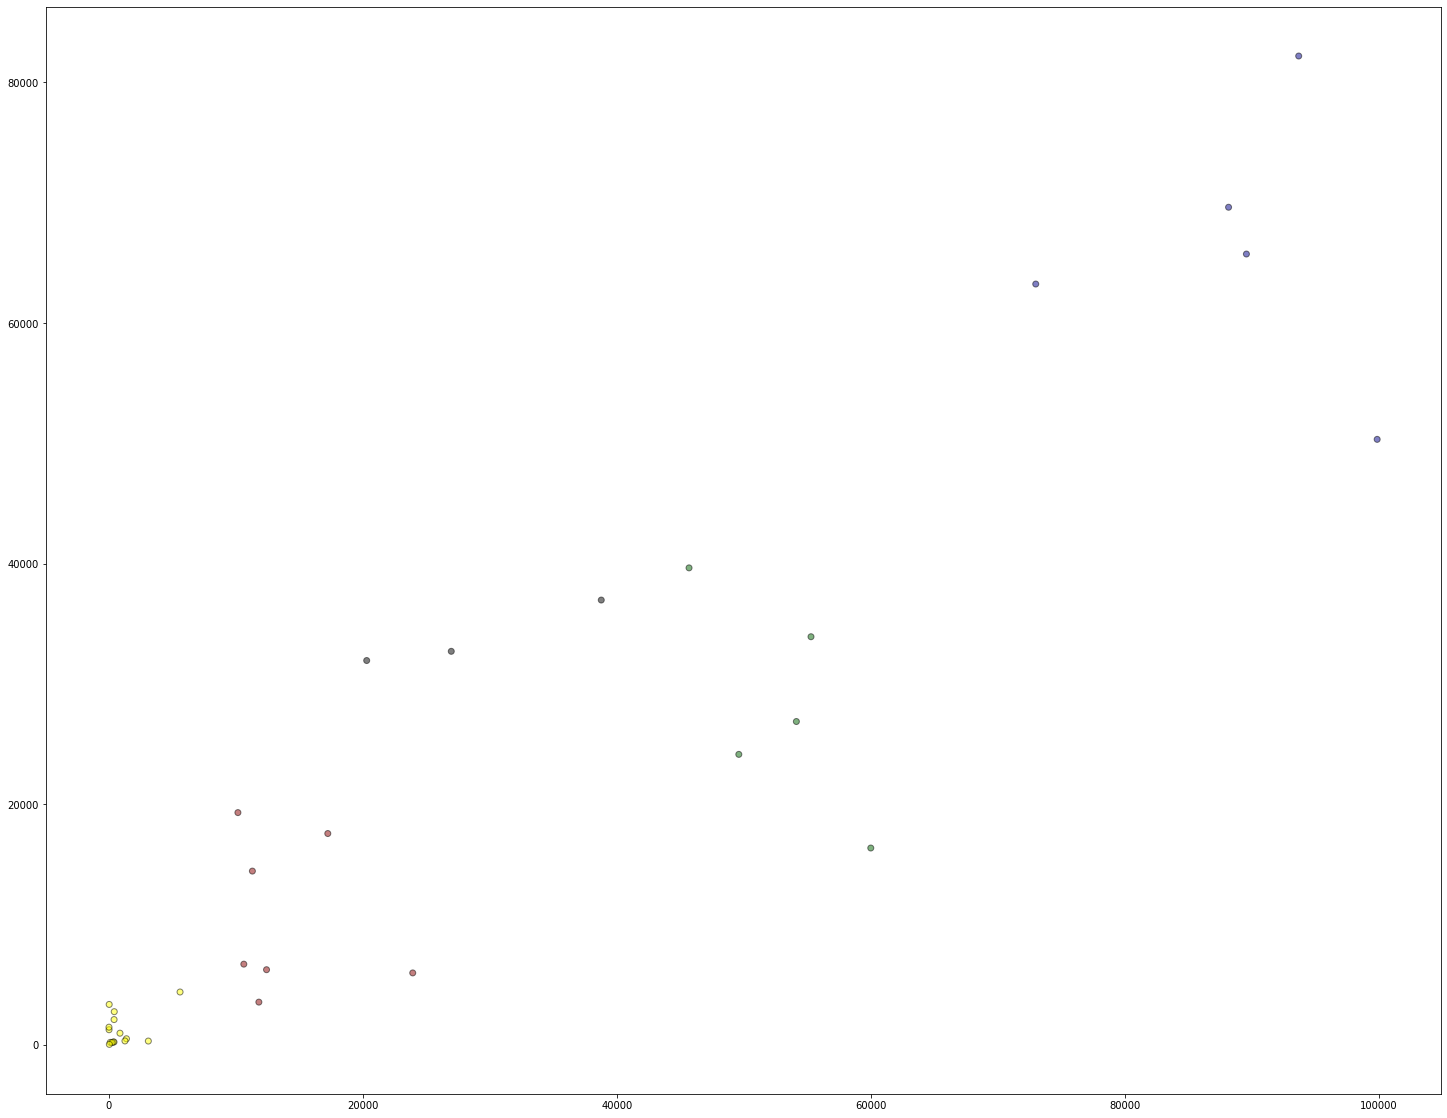

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Energy_data = pd.read_excel('D:\Innovation Lab\Production VS Consumption.xlsx')
X = Energy_data.loc[0:34,"Production(2010)"]
y = Energy_data.loc[0:34,"Consumption(2010)"]
X = X.values.reshape(-1,35)
y = y.values.reshape(-1,35)
#Z = X - y
Target = Energy_data.loc[0:34,"Target"]
#y = y.ravel()
st_x = StandardScaler()
st_y = StandardScaler()
#X = st_x.fit_transform(X)
#y = st_x.fit_transform(y)
X = np.vstack((X, y)).T
#X = st_x.fit_transform(X)
#y = Target
#X = Z
#p = X
#X = y
#y = p

colmap = {1 : "darkred", 2 : "darkblue", 3 : "darkgreen", 4 : "yellow", 5 : "black"}

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize = (25,20))
colors = map(lambda x : colmap[x+1],labels)
colors1 = list(colors)
plt.scatter(X[:,0],X[:,1],c = colors1, alpha = 0.5, edgecolors = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroids, c = colmap[idx+1])

plt.xlim(0,100000)
plt.xlim(0,100000)

# K MEANS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Data = pd.read_excel(r'D:\Innovation Lab\Renewable Energy Production (top 5 states).xlsx', index_col = 0)
Data = Data.T

Data = Data.fillna(0)
K1 = np.array(Data.Karnataka[36:40])
T1 = np.array(Data.Tamil_Nadu[36:40])
R1 = np.array(Data.Rajasthan[36:40])
G1 = np.array(Data.Gujarat[36:40])
A1 = np.array(Data.Andhra_Pradesh[36:40])
K2 = np.array(Data.Karnataka[40:44])
T2 = np.array(Data.Tamil_Nadu[40:44])
R2 = np.array(Data.Rajasthan[40:44])
G2 = np.array(Data.Gujarat[40:44])
A2 = np.array(Data.Andhra_Pradesh[40:44])
#K = np.array(K)
P = np.concatenate((K1,T1,R1,G1,A1))
Q = np.concatenate((K2,T2,R2,G2,A2))
#X = np.concatenate((X,Y), axis=0)
#Y = X
Y = Q - P
X = np.vstack((Q, Y)).T

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

colmap = {1 : "lightgreen", 2 : "orange", 3 : "yellow", 4 : "green", 5 : "red"}
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize = (10,10))
colors = map(lambda x : colmap[x+1],labels)
colors1 = list(colors)
plt.scatter(X[:,0],X[:,1],c = colors1, alpha = 0.5, edgecolors = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroids, c = colmap[idx+1])

plt.xlim(0,15)
plt.ylim(-5,5)
